In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import recall_score,precision_score,f1_score,fbeta_score,classification_report

#For modeling Ensembler
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

Loading database



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv files/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#Data Preprocessing

In [ ]:
df.info() #columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.duplicated().sum() #duplicated values in the dataset

0

In [ ]:
df.drop(columns=['User ID'],inplace=True) #drop unnecessary columns
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<ipython-input-7-3084cfb5c423>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True) #heat map


<Axes: >

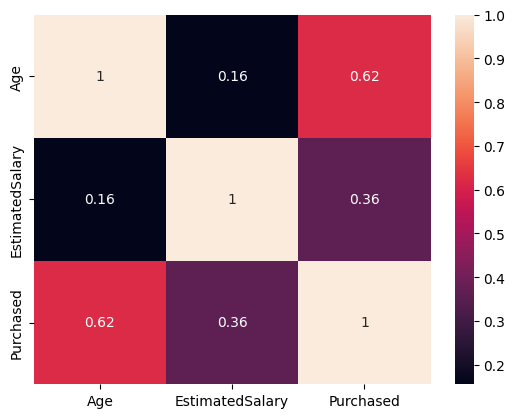

In [ ]:
sns.heatmap(df.corr(),annot = True) #heat map

Pre-Processing and Feature Engineering

In [ ]:
#remove outliners
def remove_outlier(df_in, col_name):
    df[col_name] = df[col_name].astype(int)
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

print("Old Shape: ", df.shape)

for col in df:
  if col!='Gender':
    df=remove_outlier(df, col)
print("New Shape: ", df.shape)

Old Shape:  (400, 4)
New Shape:  (400, 4)


In [ ]:
df.isnull().sum() #empty cells

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#filing empty cells
for col in df:
  if df.dtypes[col]is not int:
    df[col].fillna(df[col].mode(), inplace = True)
  else:
    df[col].fillna(df[col].median(), inplace = True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


#Training Models

In [ ]:
X = df.iloc[:, :-1].values #all the numerical features
y = df.iloc[:, -1].values #label (or target)

In [ ]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder
print(X[:10,0])
le = LabelEncoder()
X[:,0]= le.fit_transform(X[:,0])
X[:10,0]

['Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female']


array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=object)

In [ ]:
#splitting data for traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(292, 3) (108, 3) (292,) (108,)


In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)


Model 1: Logistic Regression


Before scaling

Accuracy is 66.66666666666666


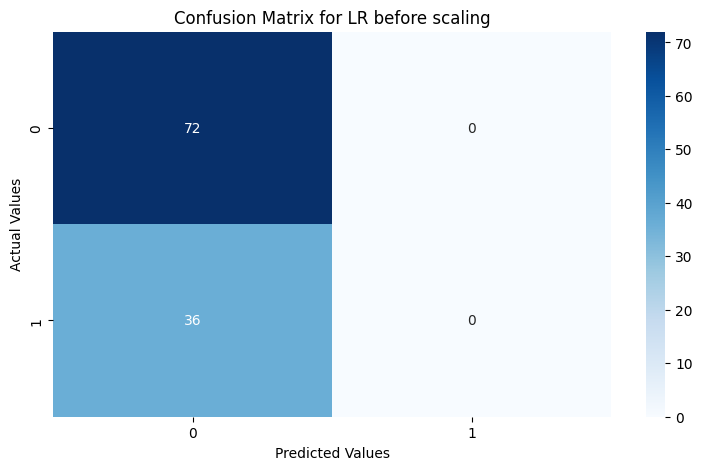

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix for LR before scaling")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

After Scaling

Accuracy is 89.81481481481481


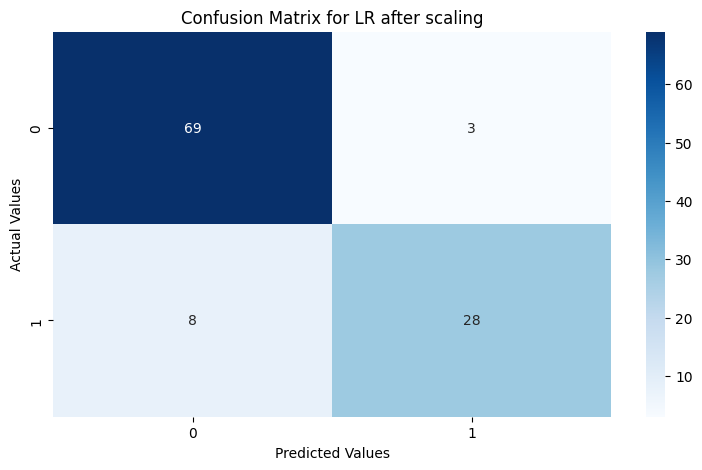

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix for LR after scaling")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

Model 2: Decision tree classifier

Accuracy is 89.81481481481481


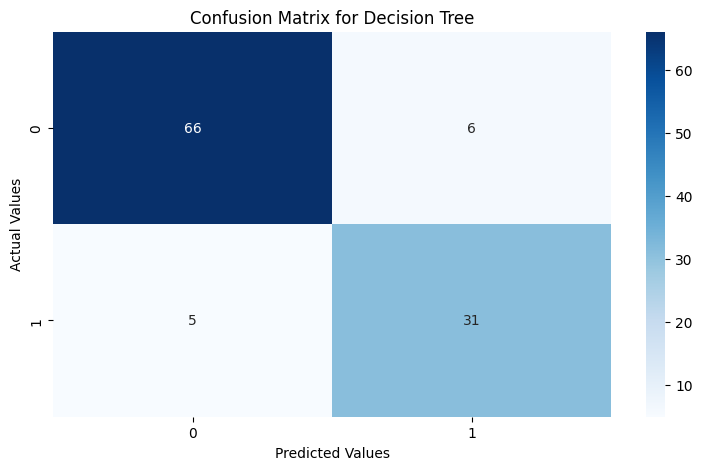

In [ ]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix for Decision Tree")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

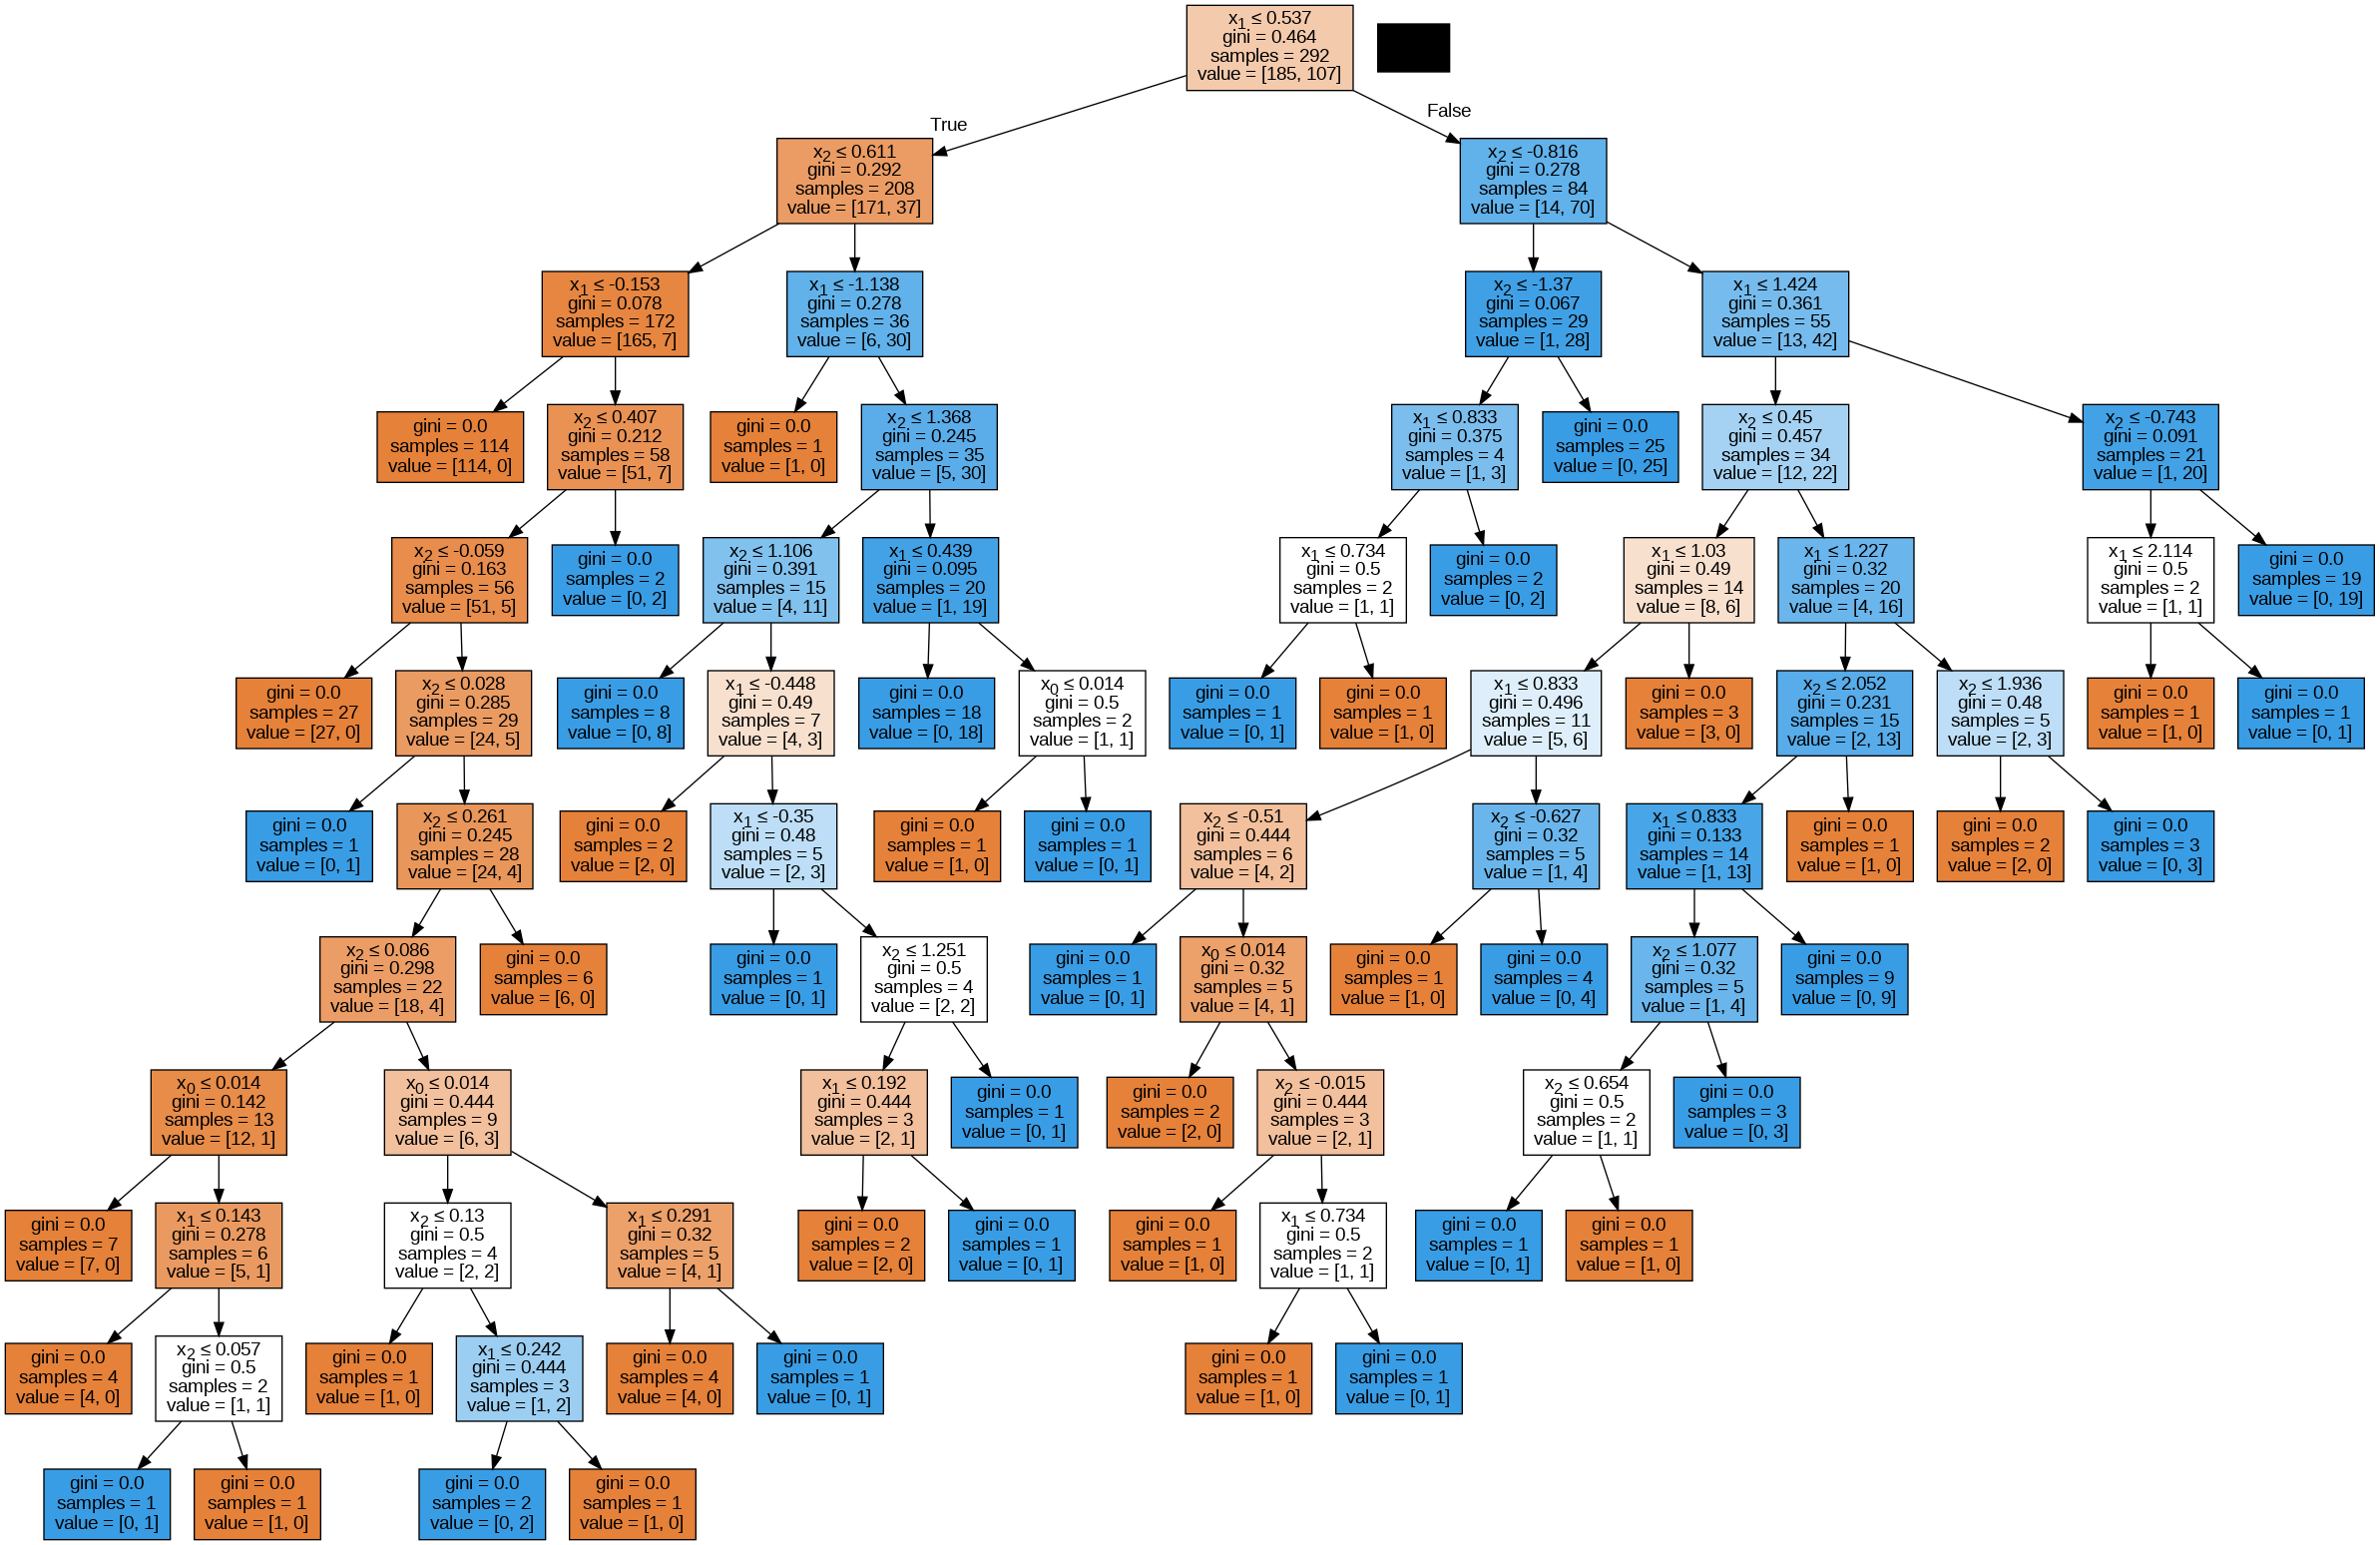

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=False, special_characters=True, feature_names=X_train.dtype.names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



Model 3: ***K-NN***

Accuracy is 92.5925925925926


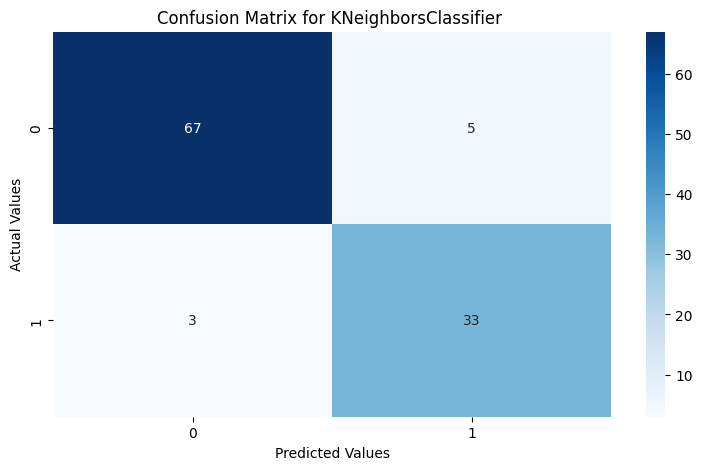

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix for KNeighborsClassifier ")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)*100))

In [ ]:
models={
    'Logistic Reression':LogisticRegression(),
    'K-Nearest neighbours':KNeighborsClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Support Vector machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'XGBoost classifier':XGBClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Ridge classifier':RidgeClassifier()
}
y_predicitions=[]
estimators=[]
y_accu=[]
x_graph=[]
for name,model in  models.items():
    print(f'{name}: ')
    x_graph.append(name)
    estimators.append((name, model))
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_predicitions.append(y_pred)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(X_train))}')
    print(f'Accuracy :{accuracy_score(y_test,y_pred)}')
    y_accu.append(accuracy_score(y_test,y_pred)*100)
    '''
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(9,5))
    plt.title(f"Confusion Matrix for {name}")
    sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    '''
    print(classification_report(y_test,y_pred, ))
    print('-'*33)

Logistic Reression: 
Training Accuracy :0.6335616438356164
Accuracy :0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       0.00      0.00      0.00        36

    accuracy                           0.67       108
   macro avg       0.33      0.50      0.40       108
weighted avg       0.44      0.67      0.53       108

---------------------------------
K-Nearest neighbours: 
Training Accuracy :0.8664383561643836
Accuracy :0.8333333333333334
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        72
           1       0.74      0.78      0.76        36

    accuracy                           0.83       108
   macro avg       0.81      0.82      0.81       108
weighted avg       0.84      0.83      0.83       108

---------------------------------
Decision Tree Classifier: 
Training Accuracy :1.0
Accuracy :0.8796296296296297
              precisi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy :1.0
Accuracy :0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.86      0.89      0.88        36

    accuracy                           0.92       108
   macro avg       0.90      0.91      0.91       108
weighted avg       0.92      0.92      0.92       108

---------------------------------
Ridge classifier: 
Training Accuracy :0.8356164383561644
Accuracy :0.8888888888888888
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        72
           1       0.90      0.75      0.82        36

    accuracy                           0.89       108
   macro avg       0.89      0.85      0.87       108
weighted avg       0.89      0.89      0.89       108

---------------------------------


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0.5, 1.03, 'Model Comparison - Model Accuracy')

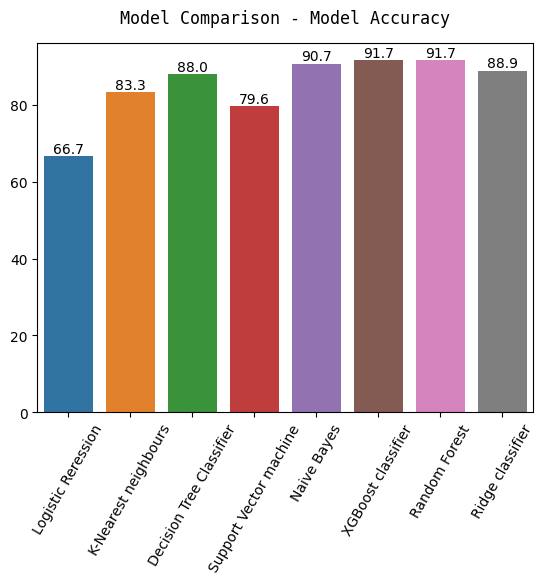

In [ ]:
plt.xticks(rotation=60)
ax=sns.barplot(x=x_graph ,y=y_accu, errwidth=0)
show_values(ax)
plt.title('Model Comparison - Model Accuracy', fontname='monospace', y=1.03)


#Combining Models

Basic ensemble methods

1)Using Avegering

In [ ]:
pred_final=[0]*len(y_predicitions[0])
num=len(y_predicitions)
for i in range(num):
  pred_final+=y_predicitions[i]
pred_final=pred_final/num
pred_final=np.round_(pred_final, 0)
pred_final=pred_final.astype(int)
print(classification_report(y_test,pred_final, ))
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        72
           1       0.88      0.78      0.82        36

    accuracy                           0.89       108
   macro avg       0.88      0.86      0.87       108
weighted avg       0.89      0.89      0.89       108

Accuracy :0.8888888888888888


In [ ]:
model_1 = KNeighborsClassifier()
model_2 = SVC()
model_3 = XGBClassifier()

# training all the model on the training dataset
model_1.fit(X_train_scaled, y_train)
model_2.fit(X_train_scaled, y_train)
model_3.fit(X_train_scaled, y_train)

# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test_scaled)
pred_2 = model_2.predict(X_test_scaled)
pred_3 = model_3.predict(X_test_scaled)

# final prediction after averaging on the prediction of all 3 models
pred_final =((pred_1+pred_2+pred_3)/3.0).astype(int)

# printing the mean squared error between real value and predicted value
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')


Accuracy :0.9166666666666666


In [ ]:
#Weighted average
pred_final=[0]*len(y_predicitions[0])
num=len(y_predicitions)
for i in range(num):
  pred_final+=y_predicitions[i]*(y_accu[i]/100)
pred_final=pred_final/(np.sum(y_accu)/100)
pred_final=np.round_(pred_final, 0)
pred_final=pred_final.astype(int)
x_graph=[]
y_accu=[]
x_graph.append('Weighted average')
y_accu.append(accuracy_score(y_test,pred_final)*100)
print(classification_report(y_test,pred_final, ))
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.86      0.86      0.86        36

    accuracy                           0.91       108
   macro avg       0.90      0.90      0.90       108
weighted avg       0.91      0.91      0.91       108

Accuracy :0.9074074074074074


 Max voting

In [ ]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train_scaled, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled)

print(f'Accuracy :{accuracy_score(y_test,pred_final)}')


Accuracy :0.9166666666666666


# Advanced ensemble methods

In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19865 sha256=f553240d5912ec7b1023911eaf2f5cd99c185fb9fdc66d16263389b44203be2c
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


Stacking

In [ ]:
from vecstack import stacking
models=[]
for item in  estimators:
  models.append(item[1])
S_train, S_test = stacking(models,X_train, y_train, X_test,regression=False,mode='oof_pred_bag',

                           needs_proba=False,save_dir=None,metric=accuracy_score,n_folds=4,
                           stratified=True,shuffle=True,random_state=0,verbose=2)
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                      n_estimators=100, max_depth=3)

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
x_graph.append('Stacking models')
y_accu.append(accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred, ))
print('Final prediction score: %.8f' % accuracy_score(y_test, y_pred))


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [8]

model  0:     [LogisticRegression]
    fold  0:  [0.64383562]
    fold  1:  [0.63013699]
    fold  2:  [0.63013699]
    fold  3:  [0.63013699]
    ----
    MEAN:     [0.63356164] + [0.00593168]
    FULL:     [0.63356164]

model  1:     [KNeighborsClassifier]
    fold  0:  [0.79452055]
    fold  1:  [0.69863014]
    fold  2:  [0.75342466]
    fold  3:  [0.84931507]
    ----
    MEAN:     [0.77397260] + [0.05522094]
    FULL:     [0.77397260]

model  2:     [DecisionTreeClassifier]
    fold  0:  [0.80821918]
    fold  1:  [0.82191781]
    fold  2:  [0.76712329]
    fold  3:  [0.86301370]
    ----
    MEAN:     [0.81506849] + [0.03424658]
    FULL:     [0.81506849]

model  3:     [SVC]
    fold  0:  [0.73972603]
    fold  1:  [0.73972603]
    fold  2:  [0.75342466]
    fold  3:  [0.79452055]
    ----
    MEAN:     [0.75684932] + [0.02245698]
    FULL:     [0.7568

/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()
/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

    fold  1:  [0.84931507]
    fold  2:  [0.83561644]
    fold  3:  [0.89041096]
    ----
    MEAN:     [0.86301370] + [0.02165944]
    FULL:     [0.86301370]

model  6:     [RandomForestClassifier]


/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    fold  0:  [0.87671233]
    fold  1:  [0.86301370]
    fold  2:  [0.87671233]
    fold  3:  [0.89041096]
    ----
    MEAN:     [0.87671233] + [0.00968639]
    FULL:     [0.87671233]

model  7:     [RidgeClassifier]
    fold  0:  [0.80821918]
    fold  1:  [0.83561644]
    fold  2:  [0.83561644]
    fold  3:  [0.84931507]
    ----
    MEAN:     [0.83219178] + [0.01492774]
    FULL:     [0.83219178]

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.92      0.92      0.92        36

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108

Final prediction score: 0.94444444


/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()
/usr/local/lib/python3.10/dist-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

Blending

In [ ]:
from numpy import hstack
def fit_ensemble(models, X_train, X_val, y_train, y_val):
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train, y_train)
        # predict on hold out set
        yhat = model.predict(X_val)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender
def predict_ensemble(models, blender, X_test):
    # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict(X_test)

        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)
# train the blending ensemble
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)
blender = fit_ensemble(estimators, X_train_part, X_val, y_train_part, y_val)
# make predictions on test set
yhat = predict_ensemble(estimators, blender, X_test)
# evaluate predictions
print(classification_report(y_test,yhat, ))
score = accuracy_score(y_test, yhat)
x_graph.append("Blending")
y_accu.append(score*100)
print('Blending Accuracy: %.3f' % (score*100))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.89      0.86      0.87        36

    accuracy                           0.92       108
   macro avg       0.91      0.90      0.91       108
weighted avg       0.92      0.92      0.92       108

Blending Accuracy: 91.667


Adaptive Boost classifier and Regressor

In [ ]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train_scaled, y_train)
pred_final = model.predict(X_test_scaled)
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

model = AdaBoostRegressor()
model.fit(X_train_scaled, y_train)
pred_final = np.round(model.predict(X_test_scaled))
x_graph.append('AdaBoost regressor')
print(classification_report(y_test,pred_final, ))
y_accu.append(accuracy_score(y_test,pred_final)*100)
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

Accuracy :0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.86      0.89      0.88        36

    accuracy                           0.92       108
   macro avg       0.90      0.91      0.91       108
weighted avg       0.92      0.92      0.92       108

Accuracy :0.9166666666666666


GradientBoost Regressor

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
pred_final = np.round(model.predict(X_test_scaled))
x_graph.append('Gradientboost Regressor')
print(classification_report(y_test,pred_final, ))
y_accu.append(accuracy_score(y_test, pred_final)*100)
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.89      0.92      0.90        36

    accuracy                           0.94       108
   macro avg       0.92      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108

Accuracy :0.9351851851851852


LightGBM Classifier

In [ ]:
train_data=lgb.Dataset(X_train_scaled,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
y_pred=model.predict(X_test_scaled)
for i in range(len(y_pred)):
  if y_pred[i]>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0
x_graph.append('LightGBM Classifier')
print(classification_report(y_test,pred_final, ))
y_accu.append(accuracy_score(y_test, pred_final)*100)
print(f'Accuracy :{accuracy_score(y_test,pred_final)}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 3
[LightGBM] [Info] Start training from score 0.366438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
estimators

[('Logistic Reression', LogisticRegression()),
 ('K-Nearest neighbours', KNeighborsClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Support Vector machine', SVC()),
 ('Naive Bayes', GaussianNB()),
 ('XGBoost classifier',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, ran

Automating traning

In [ ]:
models={

    'Voting Ensemble':VotingClassifier(estimators),

    'Random Forest':RandomForestClassifier(),
    'Bagging meta-estimator':BaggingClassifier(tree.DecisionTreeClassifier(random_state=1)),
    'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=10),

    'Adaptive Boosting':AdaBoostClassifier(n_estimators=10, random_state=1),
    'Gradient boosting':GradientBoostingClassifier(learning_rate=0.01,random_state=1),
    'Stochastic Gradient Boosting':GradientBoostingClassifier(n_estimators=10, random_state=1),
    'XGBoost (extreme Gradient Boosting)':xgb.XGBClassifier(random_state=1,learning_rate=0.01),
    #'Light GBM':lgb.Dataset(X_train_scaled,label=y_train),

}

for name,model in  models.items():
    print(f'{name}: ')
    x_graph.append(name)
    model.fit(X_train, y_train)
    print(model.score(X_test,y_test))
    pred_final = model.predict(X_test)
    print(f'Accuracy :{accuracy_score(y_test,pred_final)}')
    y_accu.append(accuracy_score(y_test,pred_final)*100)
    cm=confusion_matrix(y_test,y_pred)
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred, ))
    print('-'*33)

Voting Ensemble: 
0.9074074074074074
Accuracy :0.9074074074074074
Recall: 0.0
precision: 0.0
F1-score: 0.0
Fbeta-score: 0.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       0.00      0.00      0.00        36

    accuracy                           0.67       108
   macro avg       0.33      0.50      0.40       108
weighted avg       0.44      0.67      0.53       108

---------------------------------
Random Forest: 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

0.9074074074074074
Accuracy :0.9074074074074074
Recall: 0.0
precision: 0.0
F1-score: 0.0
Fbeta-score: 0.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       0.00      0.00      0.00        36

    accuracy                           0.67       108
   macro avg       0.33      0.50      0.40       108
weighted avg       0.44      0.67      0.53       108

---------------------------------
Bagging meta-estimator: 
0.9259259259259259
Accuracy :0.9259259259259259
Recall: 0.0
precision: 0.0
F1-score: 0.0
Fbeta-score: 0.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       0.00      0.00      0.00        36

    accuracy                           0.67       108
   macro avg       0.33      0.50      0.40       108
weighted avg       0.44      0.67      0.53       108

---------------------------------
Extremely Randomized Trees: 
0.9074074074

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

0.9351851851851852
Accuracy :0.9351851851851852
Recall: 0.0
precision: 0.0
F1-score: 0.0
Fbeta-score: 0.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       0.00      0.00      0.00        36

    accuracy                           0.67       108
   macro avg       0.33      0.50      0.40       108
weighted avg       0.44      0.67      0.53       108

---------------------------------
Stochastic Gradient Boosting: 
0.9351851851851852
Accuracy :0.9351851851851852
Recall: 0.0
precision: 0.0
F1-score: 0.0
Fbeta-score: 0.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       0.00      0.00      0.00        36

    accuracy                           0.67       108
   macro avg       0.33      0.50      0.40       108
weighted avg       0.44      0.67      0.53       108

---------------------------------
XGBoost (extreme Gradient Boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

Text(0.5, 1.03, 'Ensembler - Ensembler Accuracy')

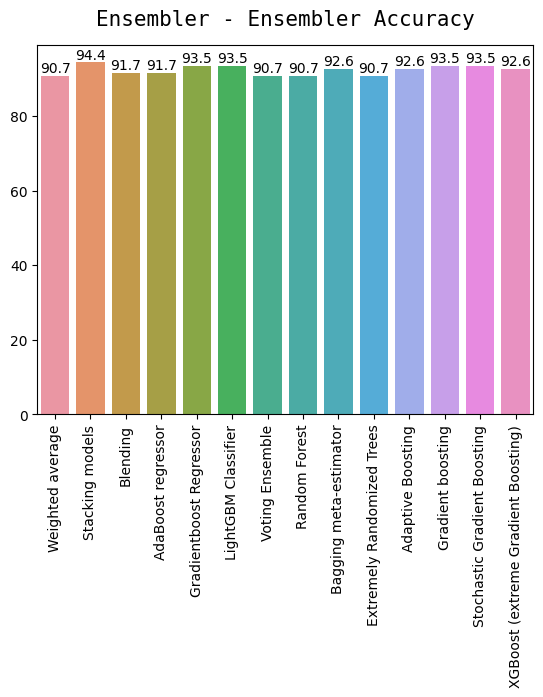

In [ ]:
plt.xticks(rotation=90)
ax=sns.barplot(x=x_graph ,y=y_accu, errwidth=0)
show_values(ax)
plt.title('Ensembler - Ensembler Accuracy', fontsize=15, fontname='monospace', y=1.03)

#Unsupervised learning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

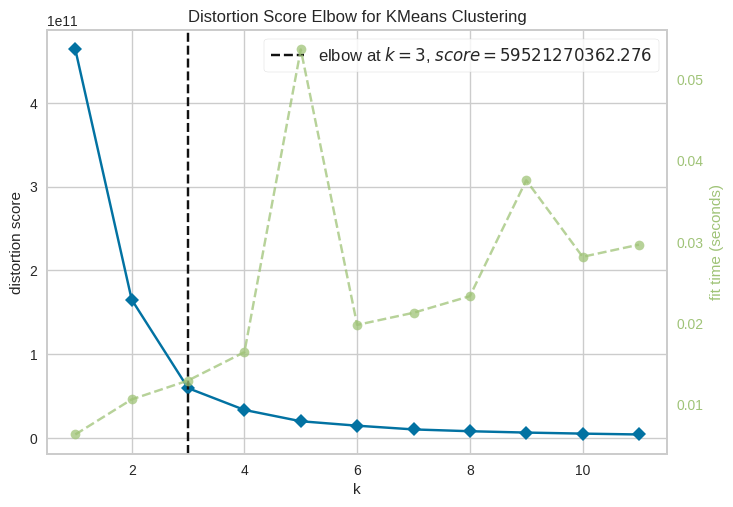

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show()

In [ ]:
# training the K-means model on a dataset
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)
print(f'Accuracy :{accuracy_score(y,y_predict)}')

Accuracy :0.69


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


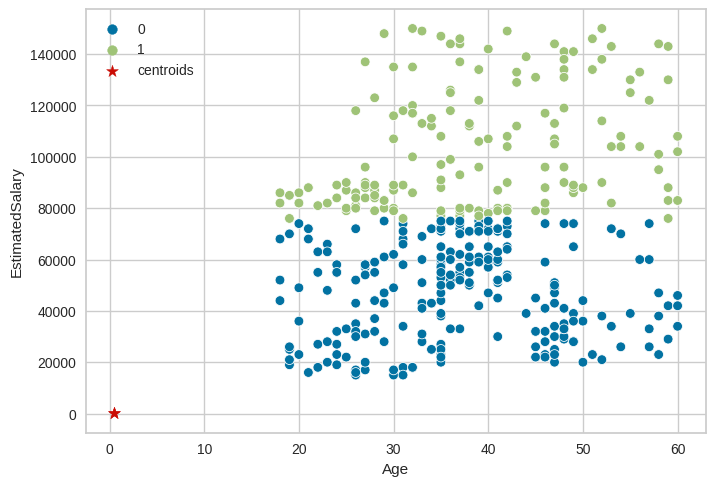

In [ ]:
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="*", c="r", s=80, label="centroids")
plt.legend()
plt.show()

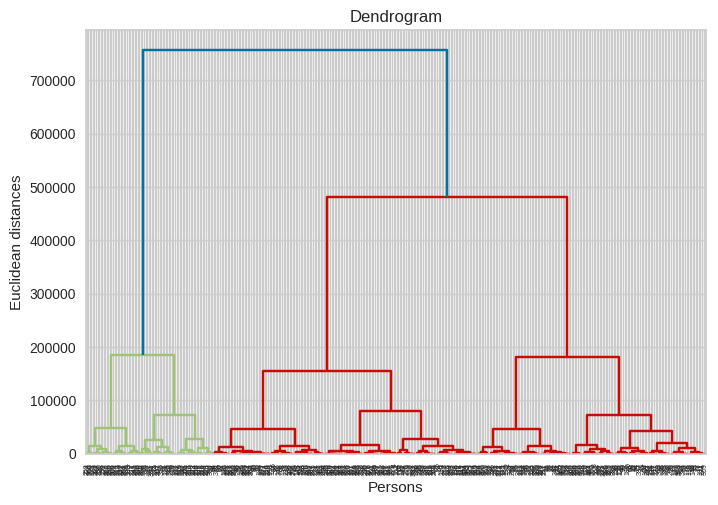

In [ ]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Persons')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
models={
    'K-means Clustering':KMeans(n_clusters=2, random_state=0),
    #Hierarchical clustering
    'Agglomerative hierarchical clustering':
    AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward'),
    'Density-based spatial clustering':DBSCAN(eps=3, min_samples=2),

}
for name,model in  models.items():
    print(f'{name}: ')
    x_graph.append(name)
    model.fit(X)
    pred_final=model.labels_
    #pred_final = model.predict(X_test)
    print(f'Accuracy :{accuracy_score(y,pred_final)}')
    y_accu.append(accuracy_score(y,pred_final)*100)
    #print(classification_report(y,y_pred, ))
    print('-'*33)

K-means Clustering: 
Accuracy :0.665
---------------------------------
Agglomerative hierarchical clustering: 
Accuracy :0.785
---------------------------------
Density-based spatial clustering: 
Accuracy :0.0075
---------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Applying PCA function on training
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred, ))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        72
           1       0.90      0.75      0.82        36

    accuracy                           0.89       108
   macro avg       0.89      0.85      0.87       108
weighted avg       0.89      0.89      0.89       108

